In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
# Evaluation tools
from sklearn.metrics import plot_confusion_matrix
# CV
from sklearn.model_selection import cross_val_score

In [17]:
dataset = pd.read_csv("dublinbikes_2020_firstQ.csv")
dataset2 = pd.read_csv("dublinbikes_2020_secondQ.csv")
dataset3 = pd.read_csv("dublinbikes_2020_thirdQ.csv")
dataset4 = pd.read_csv("dublinbikes_2020_fourthQ.csv")

print(dataset.columns)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000



#df_merged = pd.merge(dataset, dataset2, on = "STATION ID")
#df_merged = pd.merge(df_merged, datset3, on = "STATION ID")
#df_merged = pd.merge(df_merged, dataset4, on = "STATION ID"

Index(['STATION ID', 'TIME', 'LAST UPDATED', 'NAME', 'BIKE STANDS',
       'AVAILABLE BIKE STANDS', 'AVAILABLE BIKES', 'STATUS', 'ADDRESS',
       'LATITUDE', 'LONGITUDE'],
      dtype='object')


MemoryError: Unable to allocate 439. GiB for an array with shape (58960235880,) and data type int64

In [23]:
mask_oconnell = dataset2.NAME == "PRINCES STREET / O'CONNELL STREET"
oconnell_data = dataset2[mask_oconnell]
#print(oconnell_data)

mask_customhouse = dataset2.NAME == "CUSTOM HOUSE"
customhouse_data = dataset2[mask_customhouse]
#print(customhouse_data)

mask_js = dataset2.NAME == "JAMES STREET"
js_data = dataset2[mask_js]
#print(js_data)


s = pd.concat([oconnell_data,customhouse_data,js_data])
print(s)



         STATION ID                 TIME         LAST UPDATED  \
8352             33  2020-04-01 00:00:02  2020-03-31 23:52:44   
8353             33  2020-04-01 00:05:03  2020-04-01 00:02:51   
8354             33  2020-04-01 00:10:02  2020-04-01 00:02:51   
8355             33  2020-04-01 00:15:02  2020-04-01 00:12:59   
8356             33  2020-04-01 00:20:02  2020-04-01 00:12:59   
...             ...                  ...                  ...   
2898499          75  2020-07-01 23:35:02  2020-07-01 23:32:32   
2898500          75  2020-07-01 23:40:02  2020-07-01 23:32:32   
2898501          75  2020-07-01 23:45:02  2020-07-01 23:42:41   
2898502          75  2020-07-01 23:50:28  2020-07-01 23:42:41   
2898503          75  2020-07-01 23:55:02  2020-07-01 23:52:50   

                                      NAME  BIKE STANDS  \
8352     PRINCES STREET / O'CONNELL STREET           23   
8353     PRINCES STREET / O'CONNELL STREET           23   
8354     PRINCES STREET / O'CONNELL STREET

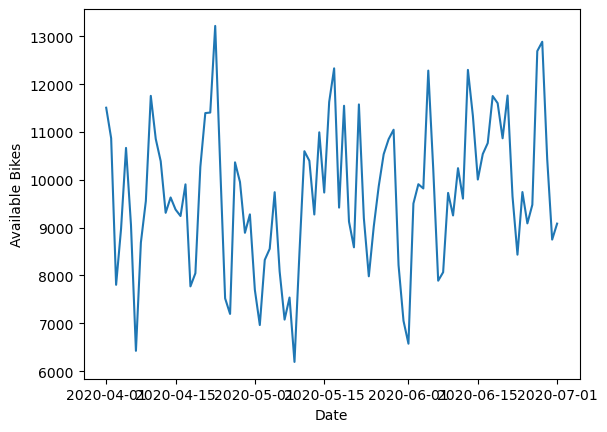

In [36]:
s['TIME'] = pd.to_datetime(s['TIME'])
grouped_df = s.groupby(pd.Grouper(key='TIME', freq = 'D'))['AVAILABLE BIKES'].sum()
grouped_df = grouped_df.reset_index()
plt.plot(grouped_df['TIME'],grouped_df['AVAILABLE BIKES'])
plt.xlabel('Date')
plt.ylabel('Available Bikes')
plt.show()

#maybe more effective here to do this for q1 and q2 over all stations to show increase in avaiable bikes
#then analyze three stations comparison 

#Effect of lockdown on - avaiable bikes, bike usage -by hour? by day?, is the effect stronger in the city centre than
#suburban?

#summary statistics


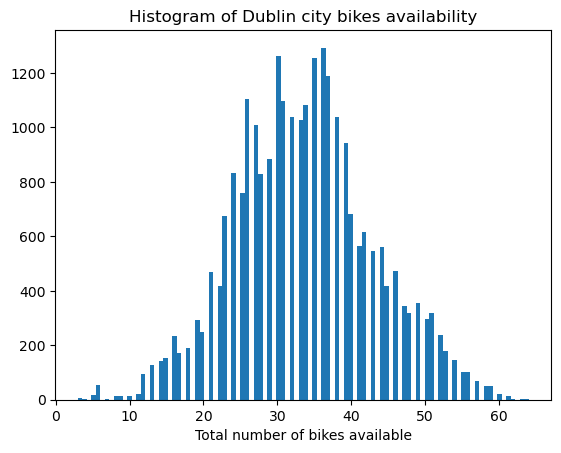

In [33]:
s_dates = pd.to_datetime(s.TIME, format = "%Y-%m-%d %H:%M:%S")
s_dates


total_bikes_av = s.groupby('TIME').agg('sum')['AVAILABLE BIKES']
times = np.unique(s_dates)

plt.hist(total_bikes_av, bins=100)
plt.title('Histogram of Dublin city bikes availability')
plt.xlabel('Total number of bikes available')
plt.show()